In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Iris.csv')
Y = df.iloc[:,-1].values
df = df.iloc[:,1:-1]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
labels = np.unique(Y)
Y = LabelEncoder().fit_transform(Y)

In [7]:
def LDA(X, Y, dimensions=2):
    uniques = np.unique(Y)
    mean_vectors = []
    for i in range(len(uniques)):
        mean_vectors.append(np.mean(X[Y==i], axis=0))
        
    S_W = np.zeros((X.shape[1],X.shape[1]))
    for i,mv in zip(range(len(labels)), mean_vectors):
        class_i_mat = np.zeros((X.shape[1],X.shape[1]))
        for row in X[Y == i]:
            row, mv = row.reshape(X.shape[1],1), mv.reshape(X.shape[1],1)
            class_i_mat += (row-mv).dot((row-mv).T)
        S_W += class_i_mat
    
    overall_mean = np.mean(X, axis=0)
    S_B = np.zeros((X.shape[1],X.shape[1]))
    for i,mean_vec in enumerate(mean_vectors):
        n = X[Y==i+1,:].shape[0]
        mean_vec = mean_vec.reshape(X.shape[1],1)
        overall_mean = overall_mean.reshape(X.shape[1],1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
    
    hstacks = []
    for i in range(dimensions):
        hstacks.append(eig_pairs[i][1].reshape(X.shape[1],1))
        
    W = np.hstack(hstacks)
    return X.dot(W)

In [5]:
df_normalized = MinMaxScaler().fit_transform(df.values)
df_standardized = StandardScaler().fit_transform(df.values)

In [8]:
lda = LDA(df.values, Y)
lda_normalized = LDA(df_normalized, Y)
lda_standardized = LDA(df_standardized, Y)

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


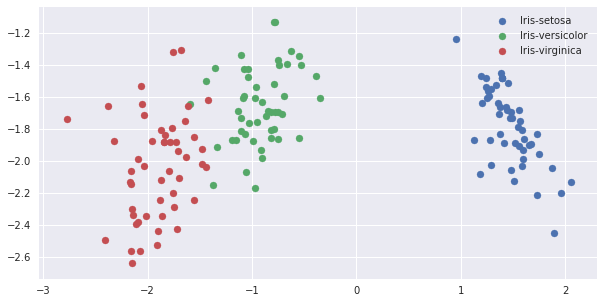

In [9]:
plt.figure(figsize=(10,5))
for no, i in enumerate(np.unique(Y)):
    plt.scatter(lda[Y==i,0], lda[Y==i,1], label=labels[no])
plt.legend()
plt.show()

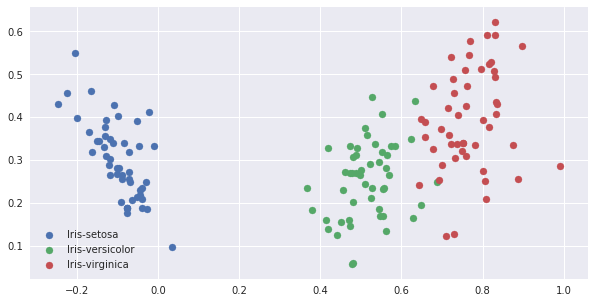

In [10]:
plt.figure(figsize=(10,5))
for no, i in enumerate(np.unique(Y)):
    plt.scatter(lda_normalized[Y==i,0], lda_normalized[Y==i,1], label=labels[no])
plt.legend()
plt.show()

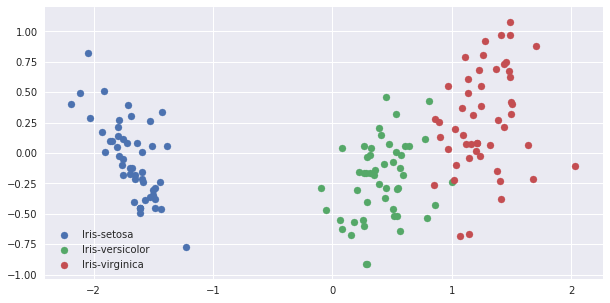

In [11]:
plt.figure(figsize=(10,5))
for no, i in enumerate(np.unique(Y)):
    plt.scatter(lda_standardized[Y==i,0], lda_standardized[Y==i,1], label=labels[no])
plt.legend()
plt.show()